# Mounting to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Imports

In [ ]:
import time
import joblib

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier # K Nearest Neighbor
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn.naive_bayes import MultinomialNB # Multinomial Naive Bayes
from sklearn.svm import LinearSVC # Linear Support Vector Classification

# Pre-processing of test data

In [ ]:
# Import dataset
test_data = pd.read_csv("/content/drive/MyDrive/dataset/testing_data.csv")
test_data

,@timestamp,_id,_index,_score,agent.ephemeral_id,agent.hostname,agent.id,agent.name,agent.type,agent.version,...,network.bytes,network.community_id,network.packets,network.transport,network.type,source.bytes,source.ip,source.packets,source.port,type
0,"Nov 18, 2022 @ 22:48:00.325",LPQAjoQBXE3V2YNvFo0D,.ds-packetbeat-8.4.3-2022.11.18-000001,-,29ea50ee-30ed-419d-902f-05d29523c129,199434c70e9f,4fe90500-a54c-4a5b-9cb3-6111980be564,199434c70e9f,packetbeat,8.4.3,...,"1,658",1:P2yv46jCVts4Ia6rzDnSiDBuC18=,10,tcp,ipv4,724,126.96.42.17,6,"39,976",flow
1,"Nov 18, 2022 @ 22:48:00.325",LfQAjoQBXE3V2YNvFo0D,.ds-packetbeat-8.4.3-2022.11.18-000001,-,29ea50ee-30ed-419d-902f-05d29523c129,199434c70e9f,4fe90500-a54c-4a5b-9cb3-6111980be564,199434c70e9f,packetbeat,8.4.3,...,"1,658",1:06Z9XgcOZvi8mBt19NJhLlicJ68=,10,tcp,ipv4,724,126.96.42.38,6,"57,486",flow
2,"Nov 18, 2022 @ 22:48:00.325",LvQAjoQBXE3V2YNvFo0D,.ds-packetbeat-8.4.3-2022.11.18-000001,-,29ea50ee-30ed-419d-902f-05d29523c129,199434c70e9f,4fe90500-a54c-4a5b-9cb3-6111980be564,199434c70e9f,packetbeat,8.4.3,...,"1,658",1:QTtzxR+ldCPZmTJdK0rH4engPtk=,10,tcp,ipv4,724,126.96.42.15,6,"37,610",flow
3,"Nov 18, 2022 @ 22:48:00.325",L_QAjoQBXE3V2YNvFo0D,.ds-packetbeat-8.4.3-2022.11.18-000001,-,29ea50ee-30ed-419d-902f-05d29523c129,199434c70e9f,4fe90500-a54c-4a5b-9cb3-6111980be564,199434c70e9f,packetbeat,8.4.3,...,"1,658",1:P+CKkhx6SRN/IyDaASCCGtH01PM=,10,tcp,ipv4,724,126.96.42.53,6,"43,332",flow
4,"Nov 18, 2022 @ 22:48:00.325",MPQAjoQBXE3V2YNvFo0D,.ds-packetbeat-8.4.3-2022.11.18-000001,-,29ea50ee-30ed-419d-902f-05d29523c129,199434c70e9f,4fe90500-a54c-4a5b-9cb3-6111980be564,199434c70e9f,packetbeat,8.4.3,...,"1,658",1:xLKIMOTfSZYcPzAJikmdJX6GDdM=,10,tcp,ipv4,724,126.96.42.13,6,"45,952",flow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,"Nov 18, 2022 @ 22:38:30.324",vvT3jYQBXE3V2YNvZBZb,.ds-packetbeat-8.4.3-2022.11.18-000001,-,29ea50ee-30ed-419d-902f-05d29523c129,199434c70e9f,4fe90500-a54c-4a5b-9cb3-6111980be564,199434c70e9f,packetbeat,8.4.3,...,"2,125",1:6ydEU+3WlLMsByHgkTnIC3gTvT8=,27,tcp,ipv4,"1,013",126.96.42.45,14,"45,400",flow
29178,"Nov 18, 2022 @ 22:38:30.324",v_T3jYQBXE3V2YNvZBZb,.ds-packetbeat-8.4.3-2022.11.18-000001,-,29ea50ee-30ed-419d-902f-05d29523c129,199434c70e9f,4fe90500-a54c-4a5b-9cb3-6111980be564,199434c70e9f,packetbeat,8.4.3,...,424,1:gTJbnjrqMx8kh9TsYcIfB6tHliE=,6,tcp,ipv4,212,126.96.42.45,3,"51,392",flow
29179,"Nov 18, 2022 @ 22:38:30.324",wPT3jYQBXE3V2YNvZBZb,.ds-packetbeat-8.4.3-2022.11.18-000001,-,29ea50ee-30ed-419d-902f-05d29523c129,199434c70e9f,4fe90500-a54c-4a5b-9cb3-6111980be564,199434c70e9f,packetbeat,8.4.3,...,"1,560",1:kukhFtj/Jsy6g84vr94I8iFlxIg=,15,icmp,ipv4,"1,560",192.168.147.129,15,-,flow
29180,"Nov 18, 2022 @ 22:38:30.324",wfT3jYQBXE3V2YNvZBZb,.ds-packetbeat-8.4.3-2022.11.18-000001,-,29ea50ee-30ed-419d-902f-05d29523c129,199434c70e9f,4fe90500-a54c-4a5b-9cb3-6111980be564,199434c70e9f,packetbeat,8.4.3,...,172,1:ypzMP2cIIGMPKQktQhTpjp7zWFc=,2,udp,ipv4,172,127.0.0.1,2,"54,005",flow


In [ ]:
# Label data
test_data['attack'] = 0
test_data.loc[test_data["source.ip"] == "126.96.42.24", 'attack'] = 1

In [ ]:
# Drop duplicates
test_data.drop_duplicates(subset='_id', keep="first")

# Replace - with 0
test_data.replace("-", 0, inplace = True)

# Convert to float64
test_data.replace(',','', regex=True, inplace=True)

test_data = test_data.astype({
    'bytes_in': 'float64',
    'bytes_out': 'float64',
    'destination.bytes': 'float64', 
    'source.bytes': 'float64',
    'network.bytes': 'float64',
    'event.duration': 'float64',
    'source.ip': 'str',
    'destination.ip': 'str',
    'source.port': 'float64',
    'destination.port': 'float64',
    'attack': 'float64'  
})

# Filter out features
selected_columns = ['bytes_in', 'bytes_out', 'destination.bytes', 'source.bytes', 'network.bytes', 'event.duration', 'source.ip', 'destination.ip', 'source.port', 'destination.port', 'attack']
filtered_dataset = test_data[selected_columns]

In [ ]:
save_path = "/content/drive/MyDrive/dataset/test_data_processed.csv"
filtered_dataset.to_csv(save_path, sep=',', index=False)

# Importing Processed dataset

In [ ]:
path = "/content/drive/MyDrive/dataset/test_data_processed.csv" 
dataset = pd.read_csv(path)

dataset

,bytes_in,bytes_out,destination.bytes,source.bytes,network.bytes,event.duration,source.ip,destination.ip,source.port,destination.port,attack
0,724.0,934.0,934.0,724.0,1658.0,284405.0,126.96.42.17,126.96.42.8,39976.0,80.0,0.0
1,724.0,934.0,934.0,724.0,1658.0,204639.0,126.96.42.38,126.96.42.8,57486.0,80.0,0.0
2,724.0,934.0,934.0,724.0,1658.0,163759.0,126.96.42.15,126.96.42.8,37610.0,80.0,0.0
3,724.0,934.0,934.0,724.0,1658.0,240751.0,126.96.42.53,126.96.42.8,43332.0,80.0,0.0
4,724.0,934.0,934.0,724.0,1658.0,165112.0,126.96.42.13,126.96.42.8,45952.0,80.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29177,1013.0,1112.0,1112.0,1013.0,2125.0,351621.0,126.96.42.45,126.96.42.8,45400.0,21.0,0.0
29178,212.0,212.0,212.0,212.0,424.0,86846.0,126.96.42.45,126.96.42.8,51392.0,50413.0,0.0
29179,1560.0,0.0,0.0,1560.0,1560.0,1340552.0,192.168.147.129,126.96.42.8,0.0,0.0,0.0
29180,172.0,0.0,0.0,172.0,172.0,7595.0,127.0.0.1,127.0.0.11,54005.0,60937.0,0.0


# Import models

In [ ]:
dir_path = "/content/drive/MyDrive/models/"

knn = joblib.load(dir_path + 'knn.pkl')
decision = joblib.load(dir_path + 'dt.pkl')
random_forest = joblib.load(dir_path + 'rf.pkl')
adaboost = joblib.load(dir_path + 'ab.pkl')
gb_model = joblib.load(dir_path + 'gb.pkl')
gausNB = joblib.load(dir_path + 'gnb.pkl')
multiNB = joblib.load(dir_path + 'mnb.pkl')
svm_model = joblib.load(dir_path + 'lsvc.pkl')

# Helper function

In [ ]:
def get_confusion_matrix_result(y_test, results):
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, results).ravel()

    print("True Negative: ", tn)
    print("False Positive: ", fp)
    print("False Negative: ", fn)
    print("True Positive: ", tp)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = metrics.accuracy_score(y_test, results)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("Accuracy: ", accuracy)
    print()

    return [accuracy, recall, precision]

In [ ]:
# X-axis contains everything except the 'attack', 'source.ip', 'destination.ip' columns. 
# IP columns are dropped because they are strings, and cannot be scaled

X = dataset.drop(['attack', 'source.ip', 'destination.ip'], axis=1) 
X = np.asarray(X)

X_scaled = (StandardScaler().fit(X).transform(X.astype(float)))
Y = dataset['attack'] # Y-axis contains only the 'attack' column.

# Predicting Test data

## K Nearest Neighbors

True Negative:  20339
False Positive:  3843
False Negative:  3580
True Positive:  1420
Precision:  0.2698080942428273
Recall:  0.284
Accuracy:  0.7456308683434995

Time taken: 1.4138917922973633
              precision    recall  f1-score   support

  Non-Attack       0.85      0.84      0.85     24182
      Attack       0.27      0.28      0.28      5000

    accuracy                           0.75     29182
   macro avg       0.56      0.56      0.56     29182
weighted avg       0.75      0.75      0.75     29182



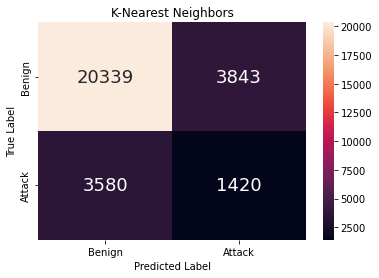

In [ ]:
# Predicting with the Test Data and the KNN Algorithm
start = time.time()
y_predicted_results = knn.predict(X_scaled)
time_taken = time.time() - start

knn_data = get_confusion_matrix_result(Y, y_predicted_results)
knn_data.append(time_taken)

print(f"Time taken: {time_taken}")
print(classification_report(Y, y_predicted_results, target_names=["Non-Attack", "Attack"]))

cf_labels = ["Benign", "Attack"]

ax = plt.axes()
sb.heatmap(confusion_matrix(Y, y_predicted_results), 
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=cf_labels, yticklabels=cf_labels)

ax.set_title('K-Nearest Neighbors')
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
plt.show()

## Decision Tree

True Negative:  24182
False Positive:  0
False Negative:  25
True Positive:  4975
Precision:  1.0
Recall:  0.995
Accuracy:  0.9991433075183332

Time taken: 0.004907369613647461
              precision    recall  f1-score   support

  Non-Attack       1.00      1.00      1.00     24182
      Attack       1.00      0.99      1.00      5000

    accuracy                           1.00     29182
   macro avg       1.00      1.00      1.00     29182
weighted avg       1.00      1.00      1.00     29182



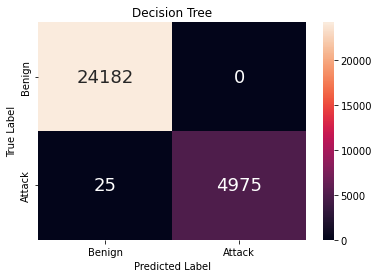

In [ ]:
# Predicting with the Test Data and the Decision Tree Algorithm
start = time.time()
y_predicted_results = decision.predict(X)
time_taken = time.time() - start

dt_data = get_confusion_matrix_result(Y, y_predicted_results)
dt_data.append(time_taken)

print(f"Time taken: {time_taken}")
print(classification_report(Y, y_predicted_results, target_names=["Non-Attack", "Attack"]))

cf_labels = ["Benign", "Attack"]

ax = plt.axes()
sb.heatmap(confusion_matrix(Y, y_predicted_results), 
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=cf_labels, yticklabels=cf_labels)

ax.set_title('Decision Tree')
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
plt.show()

## Random Forest

True Negative:  24182
False Positive:  0
False Negative:  0
True Positive:  5000
Precision:  1.0
Recall:  1.0
Accuracy:  1.0

Time taken: 0.18529915809631348
              precision    recall  f1-score   support

  Non-Attack       1.00      1.00      1.00     24182
      Attack       1.00      1.00      1.00      5000

    accuracy                           1.00     29182
   macro avg       1.00      1.00      1.00     29182
weighted avg       1.00      1.00      1.00     29182



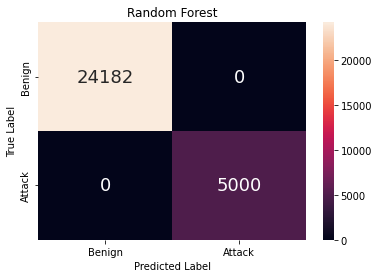

In [ ]:
# Predicting with the Test Data and the Random Forest Algorithm
start = time.time()
y_predicted_results = random_forest.predict(X)
time_taken = time.time() - start

rf_data = get_confusion_matrix_result(Y, y_predicted_results)
rf_data.append(time_taken)

print(f"Time taken: {time_taken}")
print(classification_report(Y, y_predicted_results, target_names=["Non-Attack", "Attack"]))

cf_labels = ["Benign", "Attack"]

ax = plt.axes()
sb.heatmap(confusion_matrix(Y, y_predicted_results), 
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=cf_labels, yticklabels=cf_labels)

ax.set_title('Random Forest')
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
plt.show()

## Adaboost

True Negative:  24181
False Positive:  1
False Negative:  5
True Positive:  4995
Precision:  0.9997998398718975
Recall:  0.999
Accuracy:  0.9997943938043999

Time taken: 0.2592899799346924
              precision    recall  f1-score   support

  Non-Attack       1.00      1.00      1.00     24182
      Attack       1.00      1.00      1.00      5000

    accuracy                           1.00     29182
   macro avg       1.00      1.00      1.00     29182
weighted avg       1.00      1.00      1.00     29182



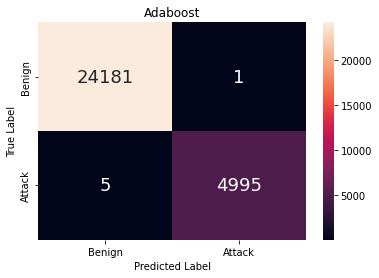

In [ ]:
# Predicting with the Test Data and the Adaboost Algorithm
start = time.time()
y_predicted_results = adaboost.predict(X)
time_taken = time.time() - start

ab_data = get_confusion_matrix_result(Y, y_predicted_results)
ab_data.append(time_taken)

print(f"Time taken: {time_taken}")
print(classification_report(Y, y_predicted_results, target_names=["Non-Attack", "Attack"]))

cf_labels = ["Benign", "Attack"]

ax = plt.axes()
sb.heatmap(confusion_matrix(Y, y_predicted_results), 
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=cf_labels, yticklabels=cf_labels)

ax.set_title('Adaboost')
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
plt.show()

## Gradient Boosting

True Negative:  24182
False Positive:  0
False Negative:  15
True Positive:  4985
Precision:  1.0
Recall:  0.997
Accuracy:  0.9994859845109999

Time taken: 0.038611412048339844
              precision    recall  f1-score   support

  Non-Attack       1.00      1.00      1.00     24182
      Attack       1.00      1.00      1.00      5000

    accuracy                           1.00     29182
   macro avg       1.00      1.00      1.00     29182
weighted avg       1.00      1.00      1.00     29182



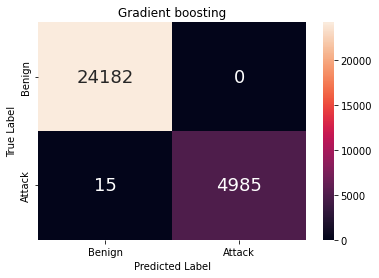

In [ ]:
# Predicting with the Test Data and the Gradiant Boosting Algorithm
start = time.time()
y_predicted_results = gb_model.predict(X)
time_taken = time.time() - start

gb_data = get_confusion_matrix_result(Y, y_predicted_results)
gb_data.append(time_taken)

print(f"Time taken: {time_taken}")
print(classification_report(Y, y_predicted_results, target_names=["Non-Attack", "Attack"]))

cf_labels = ["Benign", "Attack"]

ax = plt.axes()
sb.heatmap(confusion_matrix(Y, y_predicted_results), 
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=cf_labels, yticklabels=cf_labels)

ax.set_title('Gradient boosting')
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
plt.show()

## Gaussian Naives Bayes

True Negative:  7788
False Positive:  16394
False Negative:  0
True Positive:  5000
Precision:  0.23371038608955783
Recall:  1.0
Accuracy:  0.4382153382221918

Time taken: 0.0066721439361572266
              precision    recall  f1-score   support

  Non-Attack       1.00      0.32      0.49     24182
      Attack       0.23      1.00      0.38      5000

    accuracy                           0.44     29182
   macro avg       0.62      0.66      0.43     29182
weighted avg       0.87      0.44      0.47     29182



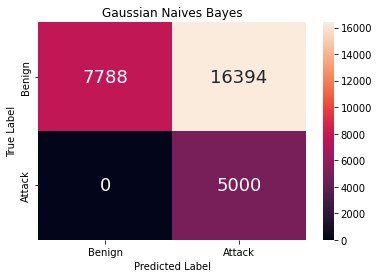

In [ ]:
# Predicting with the Test Data and the Gaussian Naives Bayes Algorithm
start = time.time()
y_predicted_results = gausNB.predict(X)
time_taken = time.time() - start

gausNB_data = get_confusion_matrix_result(Y, y_predicted_results)
gausNB_data.append(time_taken)

print(f"Time taken: {time_taken}")
print(classification_report(Y, y_predicted_results, target_names=["Non-Attack", "Attack"]))

cf_labels = ["Benign", "Attack"]

ax = plt.axes()
sb.heatmap(confusion_matrix(Y, y_predicted_results), 
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=cf_labels, yticklabels=cf_labels)

ax.set_title('Gaussian Naives Bayes')
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
plt.show()

## Multinomial Naives Bayes

True Negative:  10327
False Positive:  13855
False Negative:  5
True Positive:  4995
Precision:  0.2649867374005305
Recall:  0.999
Accuracy:  0.5250496881639367

Time taken: 0.003653287887573242
              precision    recall  f1-score   support

  Non-Attack       1.00      0.43      0.60     24182
      Attack       0.26      1.00      0.42      5000

    accuracy                           0.53     29182
   macro avg       0.63      0.71      0.51     29182
weighted avg       0.87      0.53      0.57     29182



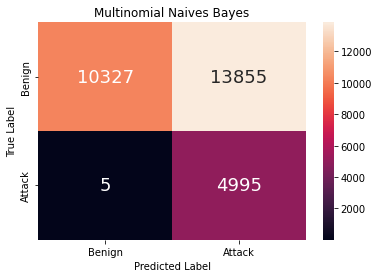

In [ ]:
# Predicting with the Test Data and the Multinomial Naives Bayes Algorithm
start = time.time()
y_predicted_results = multiNB.predict(X)
time_taken = time.time() - start

multiNB_data = get_confusion_matrix_result(Y, y_predicted_results)
multiNB_data.append(time_taken)

print(f"Time taken: {time_taken}")
print(classification_report(Y, y_predicted_results, target_names=["Non-Attack", "Attack"]))

cf_labels = ["Benign", "Attack"]

ax = plt.axes()
sb.heatmap(confusion_matrix(Y, y_predicted_results), 
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=cf_labels, yticklabels=cf_labels)

ax.set_title('Multinomial Naives Bayes')
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
plt.show()

## Linear Support Vector Classification

True Negative:  24133
False Positive:  49
False Negative:  5
True Positive:  4995
Precision:  0.9902854877081682
Recall:  0.999
Accuracy:  0.9981495442395998

Time taken: 0.0063250064849853516
              precision    recall  f1-score   support

  Non-Attack       1.00      1.00      1.00     24182
      Attack       0.99      1.00      0.99      5000

    accuracy                           1.00     29182
   macro avg       1.00      1.00      1.00     29182
weighted avg       1.00      1.00      1.00     29182



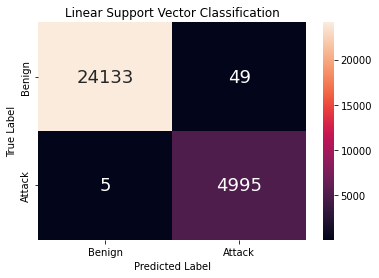

In [ ]:
# Predicting with the Test Data and the Linear Support Vector Classification Algorithm
start = time.time()
y_predicted_results = svm_model.predict(X)
time_taken = time.time() - start

svm_data = get_confusion_matrix_result(Y, y_predicted_results)
svm_data.append(time_taken)

print(f"Time taken: {time_taken}")
print(classification_report(Y, y_predicted_results, target_names=["Non-Attack", "Attack"]))

cf_labels = ["Benign", "Attack"]

ax = plt.axes()
sb.heatmap(confusion_matrix(Y, y_predicted_results), 
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=cf_labels, yticklabels=cf_labels)

ax.set_title('Linear Support Vector Classification')
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")
plt.show()

# Model Comparison

Best model for Accuracy is Random Forest at 1.0
Best model for Recall is Random Forest at 1.0
Best model for Precision is Decision Tree at 1.0
Best model for Processing Time is Multinomial Naive Bayes at 0.003653287887573242


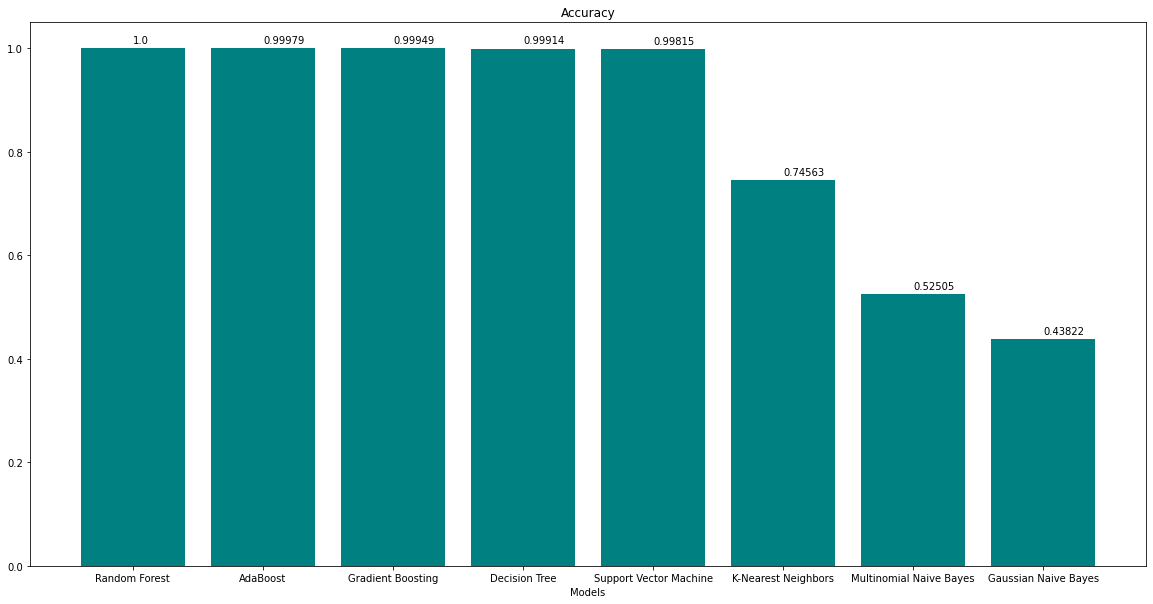

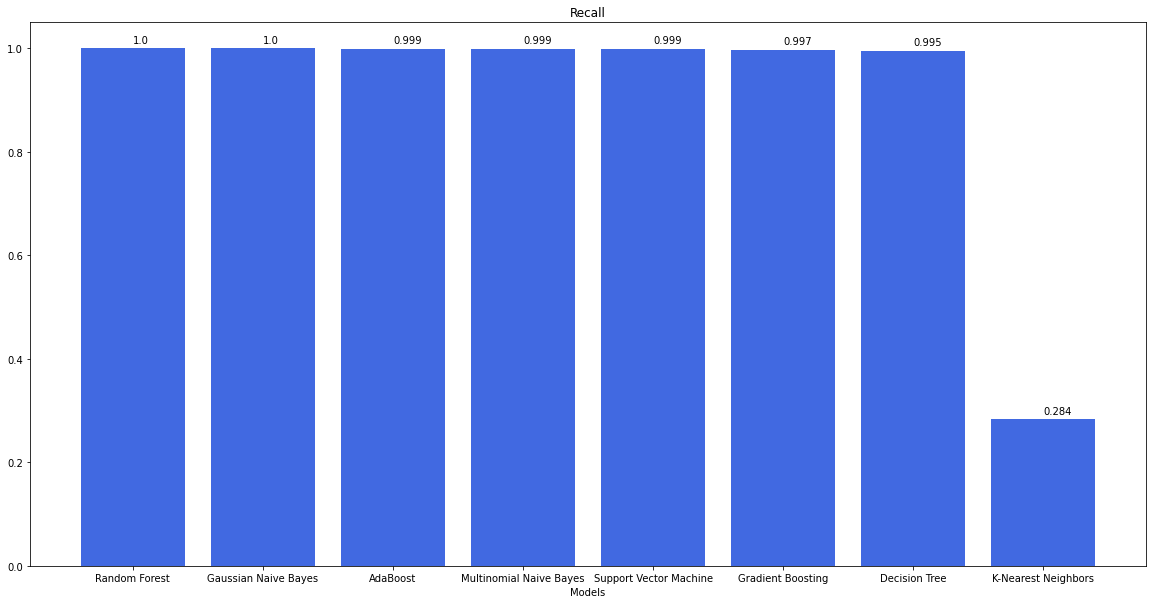

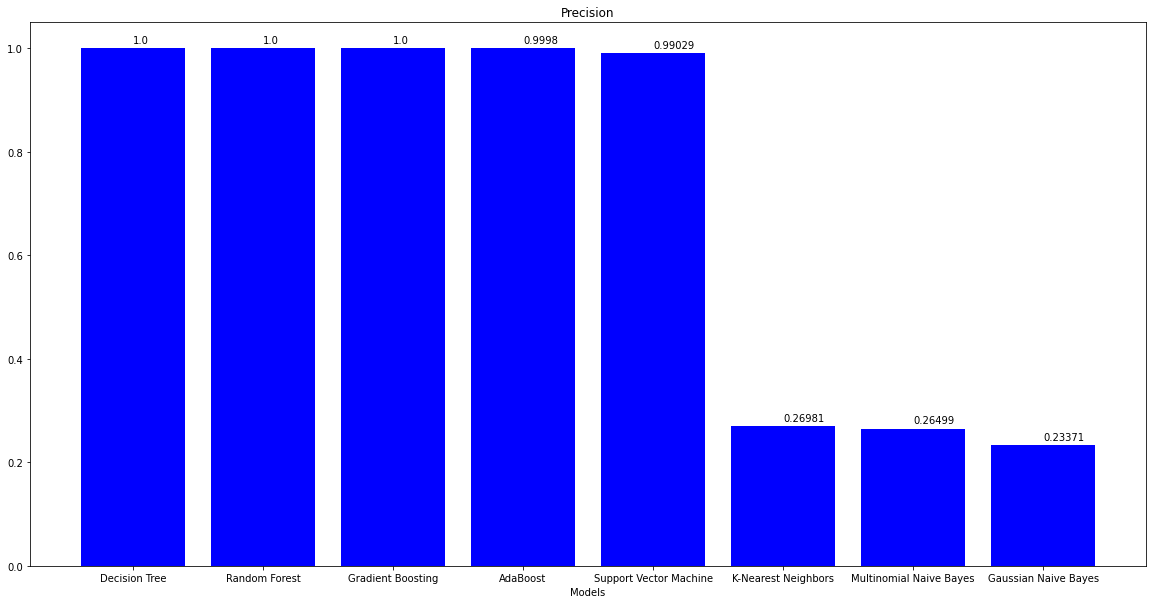

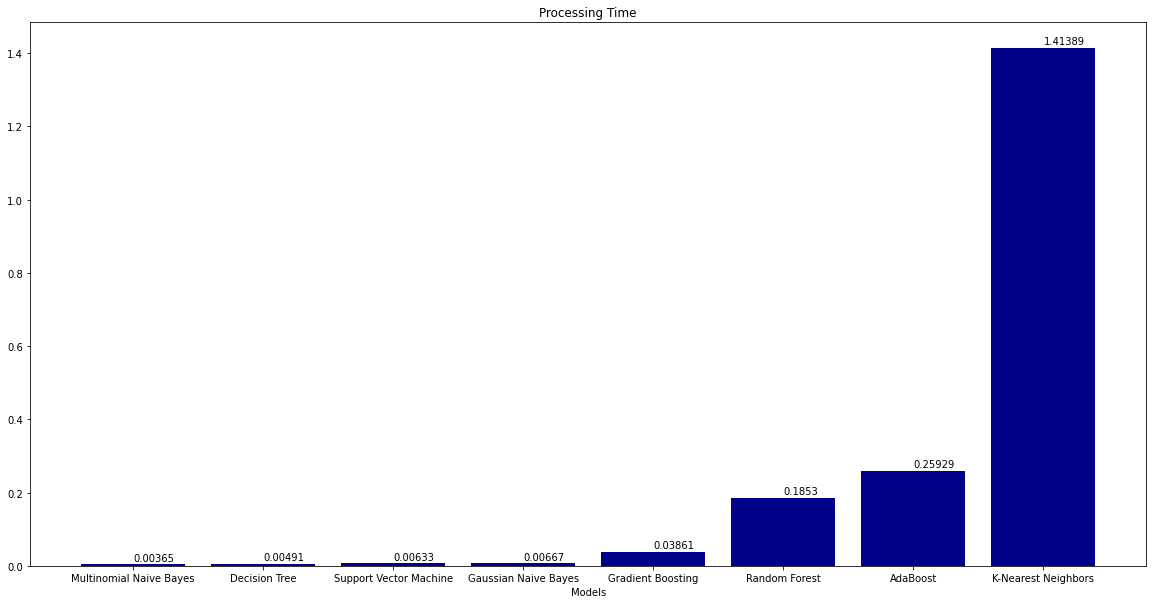

In [ ]:
labels = ['Accuracy', 'Recall', 'Precision', 'Processing Time']
colors = ['teal', 'royalBlue', 'blue', 'darkBlue']

for i in range(len(knn_data)):
  data = {
      'K-Nearest Neighbors': knn_data[i], 
      'Decision Tree': dt_data[i],
      'Random Forest': rf_data[i],
      'AdaBoost': ab_data[i],
      'Gradient Boosting': gb_data[i],
      'Gaussian Naive Bayes': gausNB_data[i], 
      'Multinomial Naive Bayes': multiNB_data[i],
      'Support Vector Machine': svm_data[i],
  }

  if labels[i] == "Processing Time":
    sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=False)
  else:
    sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)
    
  names  = [j[0] for j in sorted_data]
  values = [j[1] for j in sorted_data]

  print(f"Best model for {labels[i]} is {names[0]} at {values[0]}")

  plt.figure(figsize=(20,10))
  plt.bar(names, values, color=colors[i])
  plt.title(labels[i])
  plt.xlabel('Models')

  offset = 0.01

  for k in range(len(names)):
    plt.text(k, values[k] + offset, round(values[k], 5))

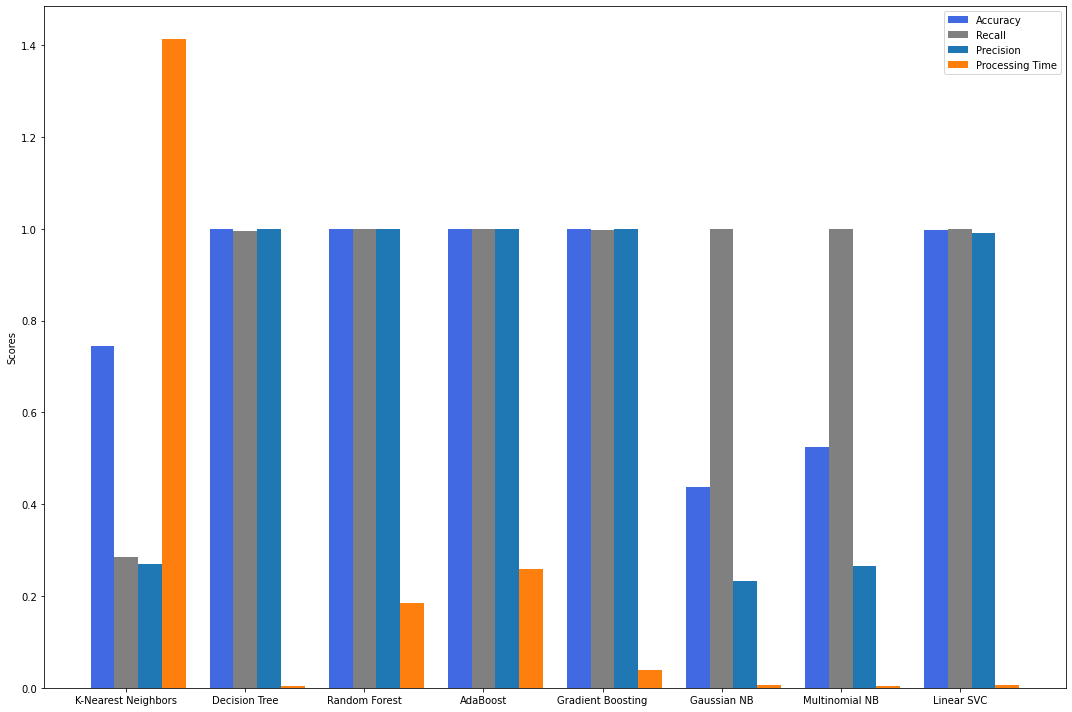

In [ ]:
data = {
    'K-Nearest Neighbors': knn_data, 
    'Decision Tree': dt_data,
    'Random Forest': rf_data,
    'AdaBoost': ab_data,
    'Gradient Boosting': gb_data,
    'Gaussian NB': gausNB_data, 
    'Multinomial NB': multiNB_data,
    'Linear SVC': svm_data
}

names = list(data.keys())
accuracies = [v[0] for _, v in data.items()]
recalls    = [v[1] for _, v in data.items()]
precisions = [v[2] for _, v in data.items()]
proc_times = [v[3] for _, v in data.items()]

width = 0.4
r1 = np.arange(0,len(names)*2,2) #r1 was reset
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]

fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(r1, accuracies, width, color='royalblue', label='Accuracy')
rects2 = ax.bar(r2, recalls, width, color='gray', label='Recall')
rects3 = ax.bar(r3, precisions, width, label='Precision')
rects4 = ax.bar(r4, proc_times, width, label='Processing Time')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_xticks([r + width for r in range(0,len(names)*2,2)])
ax.set_xticklabels(names)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 5)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)
# autolabel(rects4)

fig.tight_layout()

plt.show()